# Statistical Learning R2 Project-2 - Titan Insurance Case Study

Case Study Description:

The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover).

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np

from matplotlib import pyplot
%matplotlib inline

In [2]:
# for this case study data is stored in csv file.. let's read the file and load data into data frame for analysis
df = pd.read_csv("titan_data.csv")
df.shape

(30, 3)

In [3]:
df

,SalePerson,OldScheme,NewScheme
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84
5,6,73,86
6,7,35,32
7,8,110,104
8,9,44,38
9,10,82,107


### Find the mean of old scheme and new scheme column. (5 points)

In [4]:
# mean of old scheme and new scheme column
old_scheme_mean = df["OldScheme"].mean()
new_scheme_mean = df["NewScheme"].mean()
print("old scheme mean: ",old_scheme_mean)
print("new scheme mean: ",new_scheme_mean)

old scheme mean:  68.03333333333333
new scheme mean:  72.03333333333333


### Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (8 points)

In [5]:
# observe the data set
df[["OldScheme","NewScheme"]].describe()

,OldScheme,NewScheme
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


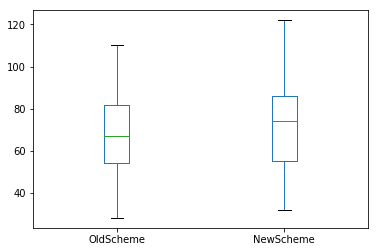

In [6]:
# observe the data set - using box plot
df[["OldScheme","NewScheme"]].plot(kind="Box")

In [7]:
# box plot show there is slight difference between old and new scheme.
# however we need to proof it statistically whether there is significant improvement in using new scheme
# As we have pair of value for same sample we will use Paired T Test to stastistically compare the mean of two samples.

In [8]:
# check the data normality - for old and new scheme

In [9]:
## normality test - For old scheme (alpha=0.05, mean 5% confidence)
## p <= alpha: reject H0, not normal.
## p > alpha: fail to reject H0, normal.

from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(df.OldScheme)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if(p > alpha):
    print("\nold scheme data is normal: normality condition passed")
else:
    print("\nold scheme data is not normal: normality condition failed")

Statistics=0.989, p=0.981

old scheme data is normal: normality condition passed


In [10]:
## normality test - for new scheme (alpha=0.05, mean 5% confidence)
## p <= alpha: reject H0, not normal.
## p > alpha: fail to reject H0, normal.
alpha = 0.05
stat, p = shapiro(df.NewScheme)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if(p > alpha):
    print("\nnew scheme data is normal: normality condition passed")
else:
    print("\nnew scheme data is not normal: normality condition failed")

Statistics=0.969, p=0.506

new scheme data is normal: normality condition passed


In [11]:
# check for variance condition .. both the data set shall have equal variance

In [12]:
## Levene test for Equal Variance
## p <= alpha: reject H0, not equal variance.
## p > alpha: fail to reject H0, equal variance.
import statistics as stats
from scipy.stats import levene

# observe the variance
print("Std. Dev of old-scheme", stats.stdev(df.OldScheme))
print("Std. Dev of new-scheme", stats.stdev(df.NewScheme))


stat, p = levene(df.OldScheme, df.NewScheme)
print('\nStatistics=%.3f, p=%.3f' % (stat, p))

if(p > alpha):
    print("\nequal variance - variance condition passed")
else:
    print("\nnot equal variance - variance condition failed")

Std. Dev of old-scheme 20.455980212074454
Std. Dev of new-scheme 24.06239494677769

Statistics=1.063, p=0.307

equal variance - variance condition passed


In [13]:
## Paired T Test for checking whether there is significant difference in two scheme

## (p > alpha) : fail to reject H0, There is no significant difference in two scheme
## (p <= alpha): reject H0, There is significant difference in two scheme.

alpha = 0.05  # five percent significance
from scipy.stats import ttest_rel
stat, p = ttest_rel(df.NewScheme, df.OldScheme)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if(p > alpha):
    print("\nAs (p > alpha), There is no significant difference in two scheme")
else:
    print("\nAs (p <= alpha), There is significant difference in two scheme")

Statistics=1.556, p=0.131

As (p > alpha), There is no significant difference in two scheme


### What conclusion does the test (p-value) lead to? (2 points)

In [14]:
## Above test is based on following hypothesis with alpha=0.05 as confidence level

## NULL Hypothesis(p > alpha) : fail to reject H0, There is no significant difference in two scheme
## Alternate hypothesis(p <= alpha): reject H0, There is significant difference in two scheme.

# CONCLUSION:: 
# As p > alpha, it implies that we failed to reject H0 and There is no significant difference 
# in two scheme

### Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
        a) The probability of a type 1 error? (2 points)

        b) What is the p- value of the hypothesis test if we test for a difference of $5000? (8 points)

        c) Power of the test (5 points)

### a) The probability of a type 1 error? (2 points)

In [15]:
# type I error, that is wrong rejections if the Null Hypothesis is true.

## Hypothesis Testing 
## Null Hypothesis : avg mean difference between two scheme is below 5000
## Alternate Hypothesis : avg mean is increase by 5000( >= 5000)

In [16]:
## Compute the difference and perform 1 sample t test with mean of 5000
import scipy.stats
df["diff"] = df["NewScheme"]-df["OldScheme"]

In [17]:
## Test for normality for diff data - (alpha=0.05, mefor 5% confidence)
## p <= alpha: reject H0, not normal.
## p > alpha: fail to reject H0, normal.

from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(df["diff"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if(p > alpha):
    print("\ndiff data is normal: normality condition passed")
else:
    print("\ndiff data is not normal: normality condition failed")

Statistics=0.940, p=0.089

diff data is normal: normality condition passed


In [18]:
# perform 1 sample t test on diff data with mean 5000 
# as sales data is in thousands.. we need to use mean value of 5 (for 5000)

## Hypothesis Testing 
## Null Hypothesis : avg mean difference is below 5000
## Alternate Hypothesis : avg mean is increase by 5000( >= 5000) - upper tail test

stat, p = scipy.stats.ttest_1samp(df["diff"], 5)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-0.389, p=0.700


In [19]:
# As we are interested in upper tail test
# probability of a type 1 error will be half (becuase of normal data distibution) 
type1_error = p/2
print("'Probability of Type-I error = %.3f" %(type1_error))

'Probability of Type-I error = 0.350


### b) What is the p- value of the hypothesis test if we test for a difference of $5000? (8 points)

In [20]:
# As per experiment performed above for 1 sample t test on differece with mean 5000.. 
# p-value for hypothesis test is as below  
print("pvalue= %.3f" %(p))

pvalue= 0.700


### c) Power of the test (5 points)

In [21]:
# Power is the probability that the test correctly rejects the Null Hypothesis if the 
# Alternative Hypothesis is true.

# to calculate power of hypothesis test, we need to know the below 3 parameters such as 
# effect-size, num of ovservation and alpha

In [22]:
# as both scheme samples(groups) having equal size and equal variance..
# we can use Cohen's d for calculating the effect size

# Effect size measures for quantifying the difference between groups,

from numpy import mean, var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

# calculate cohen's d
d = cohend(df.NewScheme,df.OldScheme)
print('Cohens d: %.3f' % d)

Cohens d: 0.179


In [23]:
# effect shows a weak relationship between the samples

In [24]:
from statsmodels.stats import power

# Calculate the power of a t-test for one sample or paired samples
n = len(df.NewScheme)
ttest_power = power.TTestPower()
power = ttest_power.power(effect_size=d, nobs=n, alpha=p)
print('Statistical Power: %.3f' % power)
print('Type-II Error(beta): %.3f' % (1-power))

Statistical Power: 0.810
Type-II Error(beta): 0.190


In [25]:
# Answer: power of test is 81% 
# this is probability of correctly rejecting the NULL when alternate is TRUE.